## Inactive Subscription data analysis

**Google Colab 으로 돌려야 됩니다*

In [50]:
"""
input: customer dataset from Glew.
output: none
"""

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'svg')

'\ninput: customer dataset from Glew.\noutput: none\n'

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st
import math

%matplotlib inline

def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]


mpl.rcParams.update(mpl.rcParamsDefault)

# makes plots visible in pycharm
plt.style.use({'figure.facecolor':'white'})

PATH = 'inactive_customers_1-13.csv'
df = pd.read_csv(PATH, delimiter=',')

In [52]:
df.columns.tolist()

['customer created date',
 'recharge customer id',
 'recharge purchase id',
 'item created date',
 'cancellation date',
 'customer first name',
 'customer last name',
 'customer email',
 'customer phone',
 'customer status',
 'past orders count',
 'product title',
 'variant title',
 'quantity',
 'cancel reason',
 'cancel reason comments',
 'still has valid payment method',
 'total number active subscriptions',
 'total number of subscriptions']

In [53]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions
0,2020-08-15 16:12:42,47160030,52021211,2020-08-15 16:12:49,2021-01-12 16:14:42,Angela Rose,Lopez,angelr0777@gmail.com,9164771113,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Financial reasons,NaN,1,0,1
1,2020-08-27 14:51:47,48006409,52897547,2020-08-27 14:51:50,2021-01-12 12:30:37,Blair,Kellerhals,cloudagesymphony01@gmail.com,+1(970) 380-3700,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1
2,2020-07-16 12:54:41,45495864,50296041,2020-07-16 12:54:46,2021-01-12 10:21:37,Hannah,Jensen,hannahjensen97@yahoo.com,2567862773,CANCELLED,3,Daebak Jewelry Collection - Seasonal Plan (aut...,NaN,1,Planning to re-subscribe later,NaN,1,0,1
3,2020-12-14 00:09:42,55145806,59311519,2020-12-14 00:09:46,2021-01-12 09:43:02,Matthew,Berky,berkymatthew@gmail.com,1(860) 333-7684,CANCELLED,1,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,I only wanted one box,NaN,1,0,1
4,2020-08-24 19:57:14,47614713,52494706,2020-08-24 19:57:19,2021-01-12 07:41:46,christina,lucas,clucasbrown71@gmail.com,6028315274,CANCELLED,1,Deluxe - 6 Month Prepay Auto renew,NaN,1,Shipping issues,all of the snacks were melted in the last box ...,1,0,1


In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201 entries, 0 to 4200
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   customer created date              4201 non-null   object
 1   recharge customer id               4201 non-null   int64 
 2   recharge purchase id               4201 non-null   int64 
 3   item created date                  4201 non-null   object
 4   cancellation date                  4201 non-null   object
 5   customer first name                4199 non-null   object
 6   customer last name                 4201 non-null   object
 7   customer email                     4201 non-null   object
 8   customer phone                     4174 non-null   object
 9   customer status                    4201 non-null   object
 10  past orders count                  4201 non-null   int64 
 11  product title                      4201 non-null   object
 12  varian

In [55]:
df.describe()

,recharge customer id,recharge purchase id,past orders count,quantity,still has valid payment method,total number active subscriptions,total number of subscriptions
count,4.201000e+03,4.201000e+03,4201.000000,4201.000000,4201.000000,4201.0,4201.000000
mean,3.755097e+07,4.225960e+07,1.990002,1.005475,0.857891,0.0,1.181861
std,5.926332e+06,6.263554e+06,1.396559,0.091123,0.349203,0.0,0.642365
min,3.141258e+07,3.528443e+07,0.000000,1.000000,0.000000,0.0,1.000000
25%,3.290311e+07,3.725724e+07,1.000000,1.000000,1.000000,0.0,1.000000
50%,3.476403e+07,3.938167e+07,2.000000,1.000000,1.000000,0.0,1.000000
75%,4.200058e+07,4.716193e+07,2.000000,1.000000,1.000000,0.0,1.000000
max,5.672805e+07,6.083991e+07,15.000000,5.000000,1.000000,0.0,10.000000


In [56]:
df['cancel reason'].value_counts()

Financial reasons                        1151
I only wanted one box                     984
Max Number of Charge attempts reached     579
Planning to re-subscribe later            558
Other reason                              405
Shipping issues                           206
Not worth the price                       152
I'm moving                                 42
Other service issues                       40
Box arrived too late                       40
Upgrade to Annual                          23
other                                      17
Name: cancel reason, dtype: int64

In [57]:
df['cancel reason'].describe()

count                  4197
unique                   12
top       Financial reasons
freq                   1151
Name: cancel reason, dtype: object

#### total number of subscriptions = active + inactive

In [58]:
df['total number of subscriptions'].value_counts()

1     3645
2      453
3       74
10      11
5       10
4        8
Name: total number of subscriptions, dtype: int64

#### total number of active subscriptions = only active - 1 means active

In [59]:
df['total number active subscriptions'].value_counts()


0    4201
Name: total number active subscriptions, dtype: int64

In [60]:
df['past orders count'].value_counts()

1     1961
2     1290
3      466
4      229
5      130
6       71
7       23
10      11
8        7
15       5
0        5
9        3
Name: past orders count, dtype: int64

In [61]:
df['cancellation date'] = pd.to_datetime(df['cancellation date'].astype(str))
df['customer created date'] = pd.to_datetime(df['customer created date'].astype(str))

In [62]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions
0,2020-08-15 16:12:42,47160030,52021211,2020-08-15 16:12:49,2021-01-12 16:14:42,Angela Rose,Lopez,angelr0777@gmail.com,9164771113,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Financial reasons,NaN,1,0,1
1,2020-08-27 14:51:47,48006409,52897547,2020-08-27 14:51:50,2021-01-12 12:30:37,Blair,Kellerhals,cloudagesymphony01@gmail.com,+1(970) 380-3700,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1
2,2020-07-16 12:54:41,45495864,50296041,2020-07-16 12:54:46,2021-01-12 10:21:37,Hannah,Jensen,hannahjensen97@yahoo.com,2567862773,CANCELLED,3,Daebak Jewelry Collection - Seasonal Plan (aut...,NaN,1,Planning to re-subscribe later,NaN,1,0,1
3,2020-12-14 00:09:42,55145806,59311519,2020-12-14 00:09:46,2021-01-12 09:43:02,Matthew,Berky,berkymatthew@gmail.com,1(860) 333-7684,CANCELLED,1,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,I only wanted one box,NaN,1,0,1
4,2020-08-24 19:57:14,47614713,52494706,2020-08-24 19:57:19,2021-01-12 07:41:46,christina,lucas,clucasbrown71@gmail.com,6028315274,CANCELLED,1,Deluxe - 6 Month Prepay Auto renew,NaN,1,Shipping issues,all of the snacks were melted in the last box ...,1,0,1


In [63]:
df['subscription duration'] = df['cancellation date'] - df['customer created date']
df['subscription duration'].describe()

count                           4201
mean     141 days 08:26:37.831468698
std      120 days 07:21:53.034752770
min                  0 days 00:00:45
25%                 43 days 23:06:49
50%                 98 days 04:33:30
75%                221 days 20:35:05
max                518 days 09:23:50
Name: subscription duration, dtype: object

OverflowError: int too big to convert

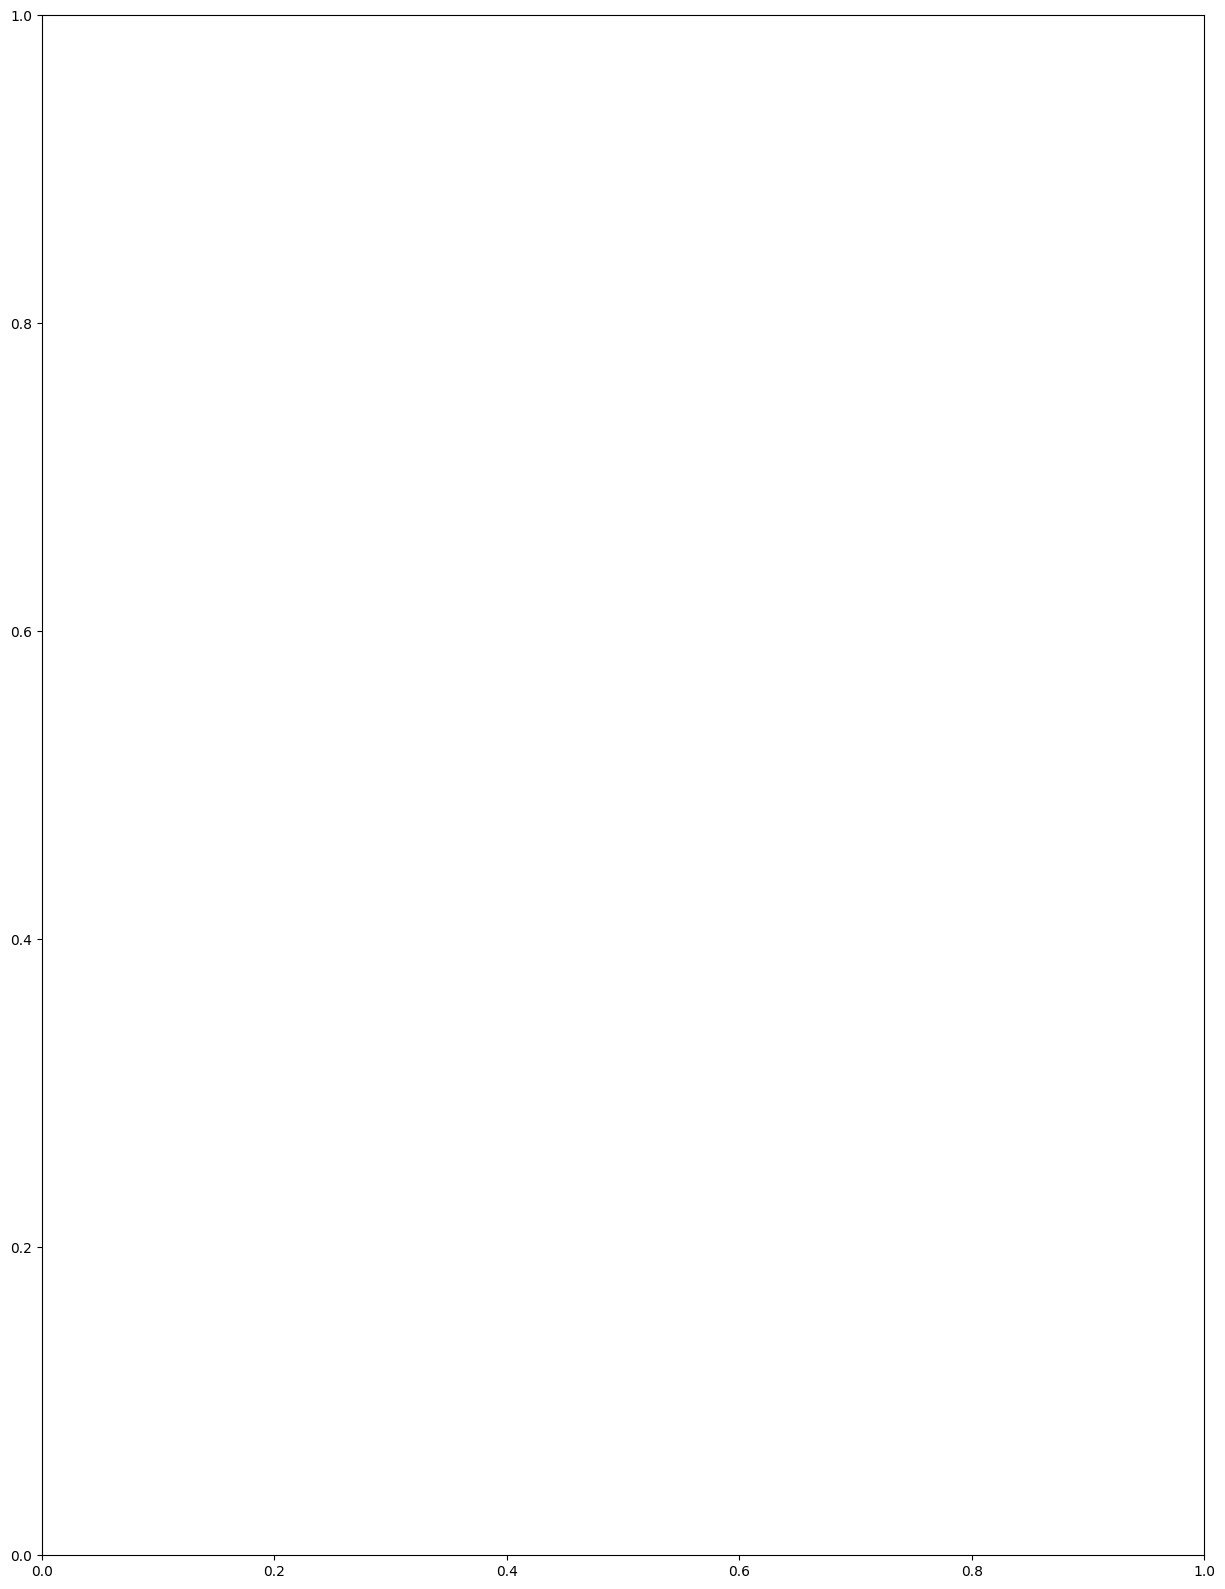

In [64]:
plt.rcParams["figure.figsize"] = [15, 20]
df.boxplot(column=['subscription duration'], by=['cancel reason'])
plt.xticks(rotation=90)
plt.ylabel("duration in sec")
plt.savefig('bar1.png', bbox_inches='tight')
plt.show()

In [65]:
df['cancel reason'].value_counts()

Financial reasons                        1151
I only wanted one box                     984
Max Number of Charge attempts reached     579
Planning to re-subscribe later            558
Other reason                              405
Shipping issues                           206
Not worth the price                       152
I'm moving                                 42
Other service issues                       40
Box arrived too late                       40
Upgrade to Annual                          23
other                                      17
Name: cancel reason, dtype: int64

In [66]:
df_without = df['subscription duration']

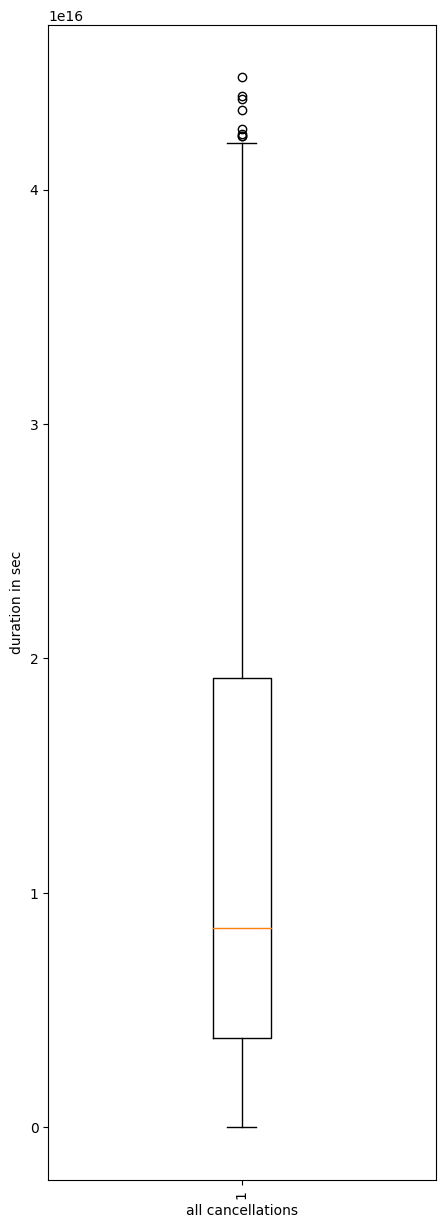

In [67]:
plt.rcParams["figure.figsize"] = [5, 15]
plt.boxplot(df_without)
plt.xticks(rotation=90)
plt.xlabel("all cancellations")
plt.ylabel("duration in sec")
plt.yticks()
plt.savefig('bar2.png', bbox_inches='tight')
plt.show()


In [68]:
df['subscription duration']

0      150 days 00:02:00
1      137 days 21:38:50
2      179 days 21:26:56
3       29 days 09:33:20
4      140 days 11:44:32
              ...       
4196     0 days 00:28:36
4197     0 days 00:16:37
4198     0 days 00:19:58
4199     0 days 00:12:40
4200     0 days 00:02:34
Name: subscription duration, Length: 4201, dtype: timedelta64[ns]

In [69]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
0,2020-08-15 16:12:42,47160030,52021211,2020-08-15 16:12:49,2021-01-12 16:14:42,Angela Rose,Lopez,angelr0777@gmail.com,9164771113,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Financial reasons,NaN,1,0,1,150 days 00:02:00
1,2020-08-27 14:51:47,48006409,52897547,2020-08-27 14:51:50,2021-01-12 12:30:37,Blair,Kellerhals,cloudagesymphony01@gmail.com,+1(970) 380-3700,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1,137 days 21:38:50
2,2020-07-16 12:54:41,45495864,50296041,2020-07-16 12:54:46,2021-01-12 10:21:37,Hannah,Jensen,hannahjensen97@yahoo.com,2567862773,CANCELLED,3,Daebak Jewelry Collection - Seasonal Plan (aut...,NaN,1,Planning to re-subscribe later,NaN,1,0,1,179 days 21:26:56
3,2020-12-14 00:09:42,55145806,59311519,2020-12-14 00:09:46,2021-01-12 09:43:02,Matthew,Berky,berkymatthew@gmail.com,1(860) 333-7684,CANCELLED,1,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,I only wanted one box,NaN,1,0,1,29 days 09:33:20
4,2020-08-24 19:57:14,47614713,52494706,2020-08-24 19:57:19,2021-01-12 07:41:46,christina,lucas,clucasbrown71@gmail.com,6028315274,CANCELLED,1,Deluxe - 6 Month Prepay Auto renew,NaN,1,Shipping issues,all of the snacks were melted in the last box ...,1,0,1,140 days 11:44:32


In [70]:
subs_duration = df['subscription duration']

In [72]:
subs_duration.head()

0   150 days 00:02:00
1   137 days 21:38:50
2   179 days 21:26:56
3    29 days 09:33:20
4   140 days 11:44:32
Name: subscription duration, dtype: timedelta64[ns]

In [74]:
subs_duration.dtypes

dtype('<m8[ns]')

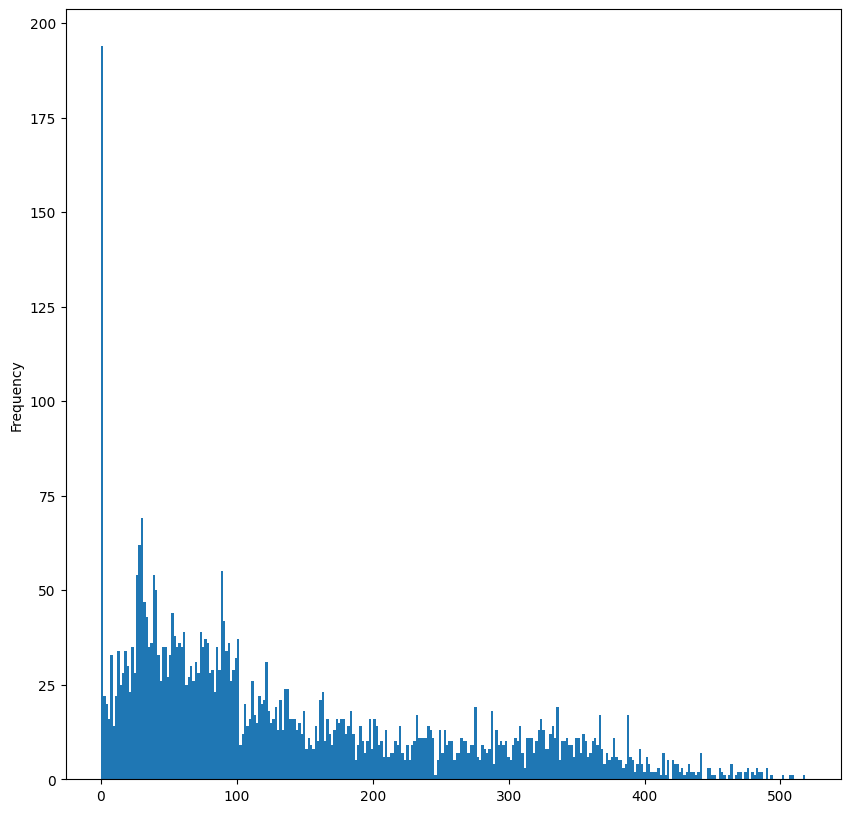

In [75]:
plt.rcParams["figure.figsize"] = [10, 10]
subs_duration = subs_duration / np.timedelta64(1, 'D')
subs_duration.plot.hist(bins=300)
plt.show()

# plt.savefig('hist.png', bbox_inches='tight')
# df['subscription duration'].describe()

In [76]:
subs_duration.head()

0    150.001389
1    137.901968
2    179.893704
3     29.398148
4    140.489259
Name: subscription duration, dtype: float64

In [77]:
# np.seterr(divide='ignore', invalid='ignore')
# best_dist, best_p, params = get_best_distribution(df_subs_duration.astype('timedelta64[s]'))
best_dist_s, best_p_s, params_s = get_best_distribution(subs_duration)

p value for norm = 2.128633451784197e-78
p value for exponweib = 1.8193815908202186e-17
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 4.509528047927919e-07
p value for genextreme = 6.667789187820873e-16
Best fitting distribution: pareto
Best p value: 4.509528047927919e-07
Parameters for the best fit: (233.12376603216563, -33184.4700963854, 33184.46941075189)


C:\Users\jaesu\PycharmProjects\Analysis\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Mean: -inf
Variance: inf
Skew: nan
Kurtosis: nan


C:\Users\jaesu\PycharmProjects\Analysis\venv\lib\site-packages\scipy\stats\_continuous_distns.py:2521: RuntimeWarning: invalid value encountered in subtract
  g2mg12 = np.where(abs(c) < 1e-7, (c*np.pi)**2.0/6.0, g2-g1**2.0)


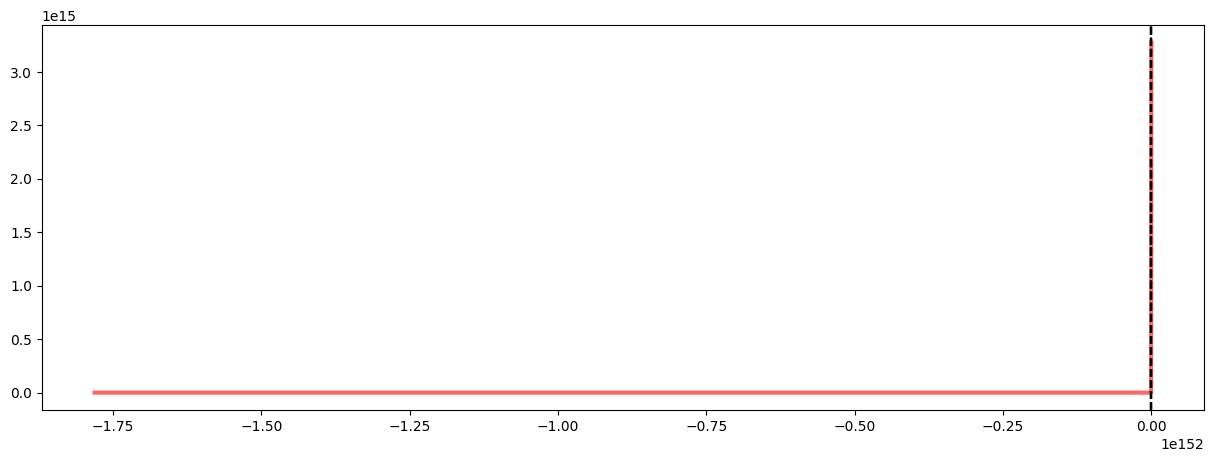

In [78]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax = plt.subplots(1, 1)

c = params_s[0]
# loc = params_s[2]
# scale = params_s[1]
mean, var, skew, kurt = st.genextreme.stats(c, moments='mvsk')

print("Mean: " + str(mean))
print("Variance: " + str(var))
print("Skew: " + str(skew))
print("Kurtosis: " + str(kurt))

x = np.linspace(st.genextreme.ppf(0.01, c), st.genextreme.ppf(0.95, c), 3600)

# standardized form
ax.plot(x, st.genextreme.pdf(x, c), 'r-', lw=3, alpha=0.6, label='genex pdf')

x_position = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
for xc in x_position:
    plt.axvline(x=xc, color='k', linestyle='--')

# real form
# ax.plot(x, st.genextreme.pdf(x, c, loc, scale), 'r-', lw=3, alpha=0.6, label='genex pdf')

plt.show()

In [79]:
# from google.colab import drive
# drive.mount('/content/drive')

After 0 days: 0.37
After 0.5 days: 0.0
After 1 days: 0.0
After 1.5 days: 0.0
After 2 days: 0.0
After 2.5 days: 0.0
After 3 days: 0.0
After 3.5 days: 0.0
After 4 days: 0.0


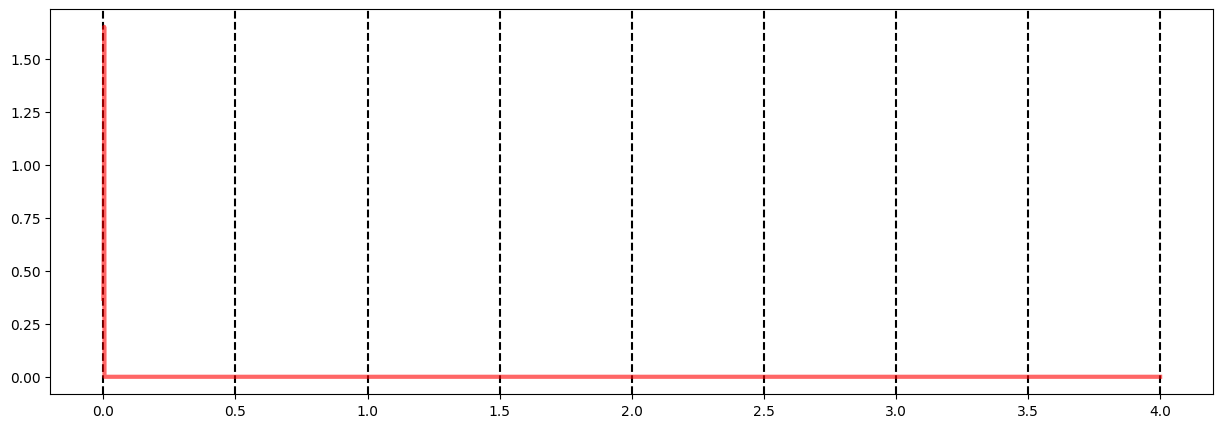

In [38]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 4, 3600)

x_position = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]
for xc in x_position:
    plt.axvline(x=xc, color='k', linestyle='--')

ax.plot(x, st.genextreme.pdf(x, c), 'r-', lw=3, alpha=0.6, label='genex pdf')

for x in x_position:
    print("After {} days: {}".format(x, round(st.genextreme.pdf(x, c), 2)))

plt.show()

In [39]:
df['product title'].value_counts()

Seasonal (ships once every season, auto-renews every season)                   1918
Daebak Box - Seasonal Plan (auto-renews, cancel anytime)                        857
Annual (ships once every season, auto-renews every year)                        639
Deluxe - Month to Month (auto-renews, cancel anytime, ships once a month)       364
Daebak Jewelry Collection - Seasonal Plan (auto-renews, cancel anytime)         116
Original - Month to Month (auto-renews, cancel anytime, ships once a month)      78
Daebak Box - Annual Plan (auto-renews, cancel anytime)                           68
Deluxe - 3 Month Prepay (auto-renews, cancel anytime, ships once a month)        63
Seasonal Auto renew                                                              34
Daebak Jewelry Collection - Annual Plan (auto-renews, cancel anytime)            26
Deluxe - 6 Month Prepay Auto renew                                               10
Original - 3 Month Prepay (auto-renews, cancel anytime, ships once a month) 

In [40]:
# density plot
df_duration_and_type = df[['subscription duration','product title']]
df_duration_and_type.head()

,subscription duration,product title
0,150 days 00:02:00,"Daebak Box - Seasonal Plan (auto-renews, cance..."
1,137 days 21:38:50,"Daebak Box - Seasonal Plan (auto-renews, cance..."
2,179 days 21:26:56,Daebak Jewelry Collection - Seasonal Plan (aut...
3,29 days 09:33:20,"Deluxe - Month to Month (auto-renews, cancel a..."
4,140 days 11:44:32,Deluxe - 6 Month Prepay Auto renew


In [41]:
# take sub type and sub duration
df_duration_and_type.boxplot(column=['subscription duration'], by=['product title'])
plt.rcParams["figure.figsize"] = [30, 30]
plt.xticks(rotation=90)
plt.ylabel("duration sec")
plt.savefig('bar3.png', bbox_inches='tight')
plt.show()

OverflowError: int too big to convert

In [42]:
df.head()

,customer created date,recharge customer id,recharge purchase id,item created date,cancellation date,customer first name,customer last name,customer email,customer phone,customer status,past orders count,product title,variant title,quantity,cancel reason,cancel reason comments,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
0,2020-08-15 16:12:42,47160030,52021211,2020-08-15 16:12:49,2021-01-12 16:14:42,Angela Rose,Lopez,angelr0777@gmail.com,9164771113,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Financial reasons,NaN,1,0,1,150 days 00:02:00
1,2020-08-27 14:51:47,48006409,52897547,2020-08-27 14:51:50,2021-01-12 12:30:37,Blair,Kellerhals,cloudagesymphony01@gmail.com,+1(970) 380-3700,CANCELLED,2,"Daebak Box - Seasonal Plan (auto-renews, cance...",NaN,1,Planning to re-subscribe later,NaN,1,0,1,137 days 21:38:50
2,2020-07-16 12:54:41,45495864,50296041,2020-07-16 12:54:46,2021-01-12 10:21:37,Hannah,Jensen,hannahjensen97@yahoo.com,2567862773,CANCELLED,3,Daebak Jewelry Collection - Seasonal Plan (aut...,NaN,1,Planning to re-subscribe later,NaN,1,0,1,179 days 21:26:56
3,2020-12-14 00:09:42,55145806,59311519,2020-12-14 00:09:46,2021-01-12 09:43:02,Matthew,Berky,berkymatthew@gmail.com,1(860) 333-7684,CANCELLED,1,"Deluxe - Month to Month (auto-renews, cancel a...",NaN,1,I only wanted one box,NaN,1,0,1,29 days 09:33:20
4,2020-08-24 19:57:14,47614713,52494706,2020-08-24 19:57:19,2021-01-12 07:41:46,christina,lucas,clucasbrown71@gmail.com,6028315274,CANCELLED,1,Deluxe - 6 Month Prepay Auto renew,NaN,1,Shipping issues,all of the snacks were melted in the last box ...,1,0,1,140 days 11:44:32


In [43]:
df['subscription duration'] = subs_duration
corr_matrix = df.corr()
corr_matrix.head()

,recharge customer id,recharge purchase id,past orders count,quantity,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
recharge customer id,1.000000,0.960387,-0.124465,-0.021444,0.086967,NaN,-0.051802,-0.429499
recharge purchase id,0.960387,1.000000,-0.024184,-0.020982,0.078210,NaN,0.089000,-0.357322
past orders count,-0.124465,-0.024184,1.000000,-0.005183,0.043955,NaN,0.574506,0.414047
quantity,-0.021444,-0.020982,-0.005183,1.000000,0.009492,NaN,-0.008879,-0.016866
still has valid payment method,0.086967,0.078210,0.043955,0.009492,1.000000,NaN,-0.024868,-0.139342


In [44]:
corr_matrix["subscription duration"].sort_values(ascending=False)

subscription duration                1.000000
past orders count                    0.414047
total number of subscriptions        0.097667
quantity                            -0.016866
still has valid payment method      -0.139342
recharge purchase id                -0.357322
recharge customer id                -0.429499
total number active subscriptions         NaN
Name: subscription duration, dtype: float64

<AxesSubplot:xlabel='subscription duration', ylabel='past orders count'>

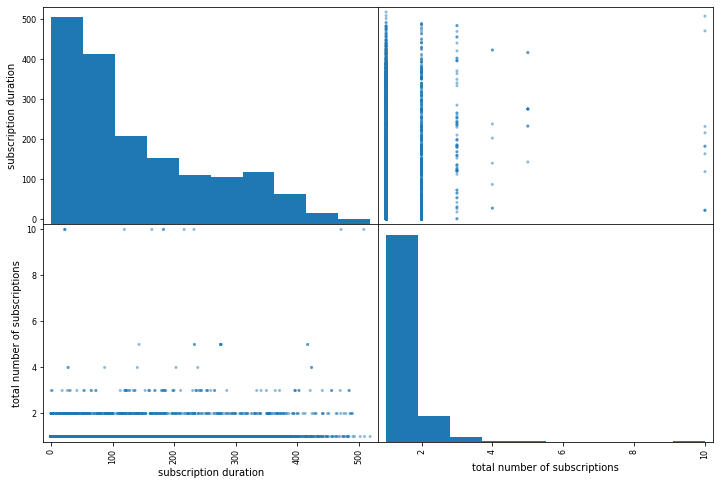

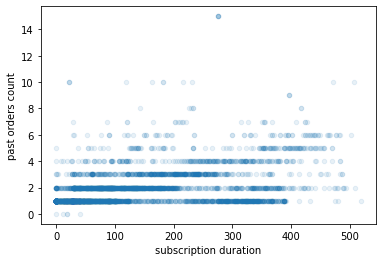

In [45]:
from pandas.plotting import scatter_matrix
%matplotlib inline
attributes = ["subscription duration", "total number of subscriptions"]
scatter_matrix(df[attributes], figsize=(12, 8))
df.plot(kind='scatter', x='subscription duration', y='past orders count', alpha=0.1)



#### Taking out 2 main reasons for unsubbing




In [80]:
PATH = 'Inactive_customers_1-13.csv'
df = pd.read_csv(PATH, delimiter=',')

In [81]:
df['cancellation date'] = pd.to_datetime(df['cancellation date'].astype(str))
df['customer created date'] = pd.to_datetime(df['customer created date'].astype(str))

In [82]:
df['subscription duration'] = df['cancellation date'] - df['customer created date']

In [83]:
df = df[(df['cancel reason']!='Max Number of Charge attempts reached')
                & (df['cancel reason']!='Financial reasons')]

In [84]:
df.describe()

,recharge customer id,recharge purchase id,past orders count,quantity,still has valid payment method,total number active subscriptions,total number of subscriptions,subscription duration
count,2.471000e+03,2.471000e+03,2471.000000,2471.000000,2471.000000,2471.0,2471.00000,2471
mean,3.800189e+07,4.271378e+07,1.938082,1.004856,0.993525,0.0,1.20518,115 days 06:49:58.606636988
std,6.184702e+06,6.510554e+06,1.445295,0.098453,0.080223,0.0,0.74556,112 days 22:29:01.725866050
min,3.141258e+07,3.528443e+07,0.000000,1.000000,0.000000,0.0,1.00000,0 days 00:00:45
25%,3.300300e+07,3.740919e+07,1.000000,1.000000,1.000000,0.0,1.00000,30 days 10:29:35
50%,3.503053e+07,3.983237e+07,2.000000,1.000000,1.000000,0.0,1.00000,72 days 16:32:31
75%,4.257462e+07,4.744815e+07,2.000000,1.000000,1.000000,0.0,1.00000,173 days 21:25:02
max,5.672805e+07,6.083991e+07,15.000000,5.000000,1.000000,0.0,10.00000,518 days 09:23:50


In [85]:
df['cancel reason'].count()

2467

In [86]:
df['cancel reason'].value_counts()

I only wanted one box             984
Planning to re-subscribe later    558
Other reason                      405
Shipping issues                   206
Not worth the price               152
I'm moving                         42
Other service issues               40
Box arrived too late               40
Upgrade to Annual                  23
other                              17
Name: cancel reason, dtype: int64

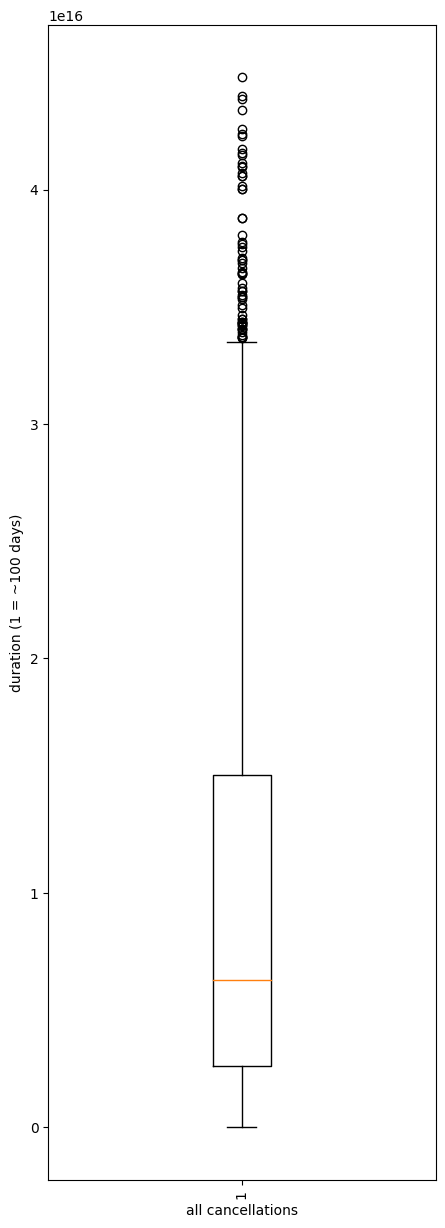

In [87]:
df_without = df['subscription duration']
plt.rcParams["figure.figsize"] = [5, 15]
plt.boxplot(df_without)
plt.xticks(rotation=90)
plt.xlabel("all cancellations")
plt.ylabel("duration (1 = ~100 days)")
plt.yticks()
plt.savefig('bar1_without.png', bbox_inches='tight')
plt.show()

OverflowError: int too big to convert

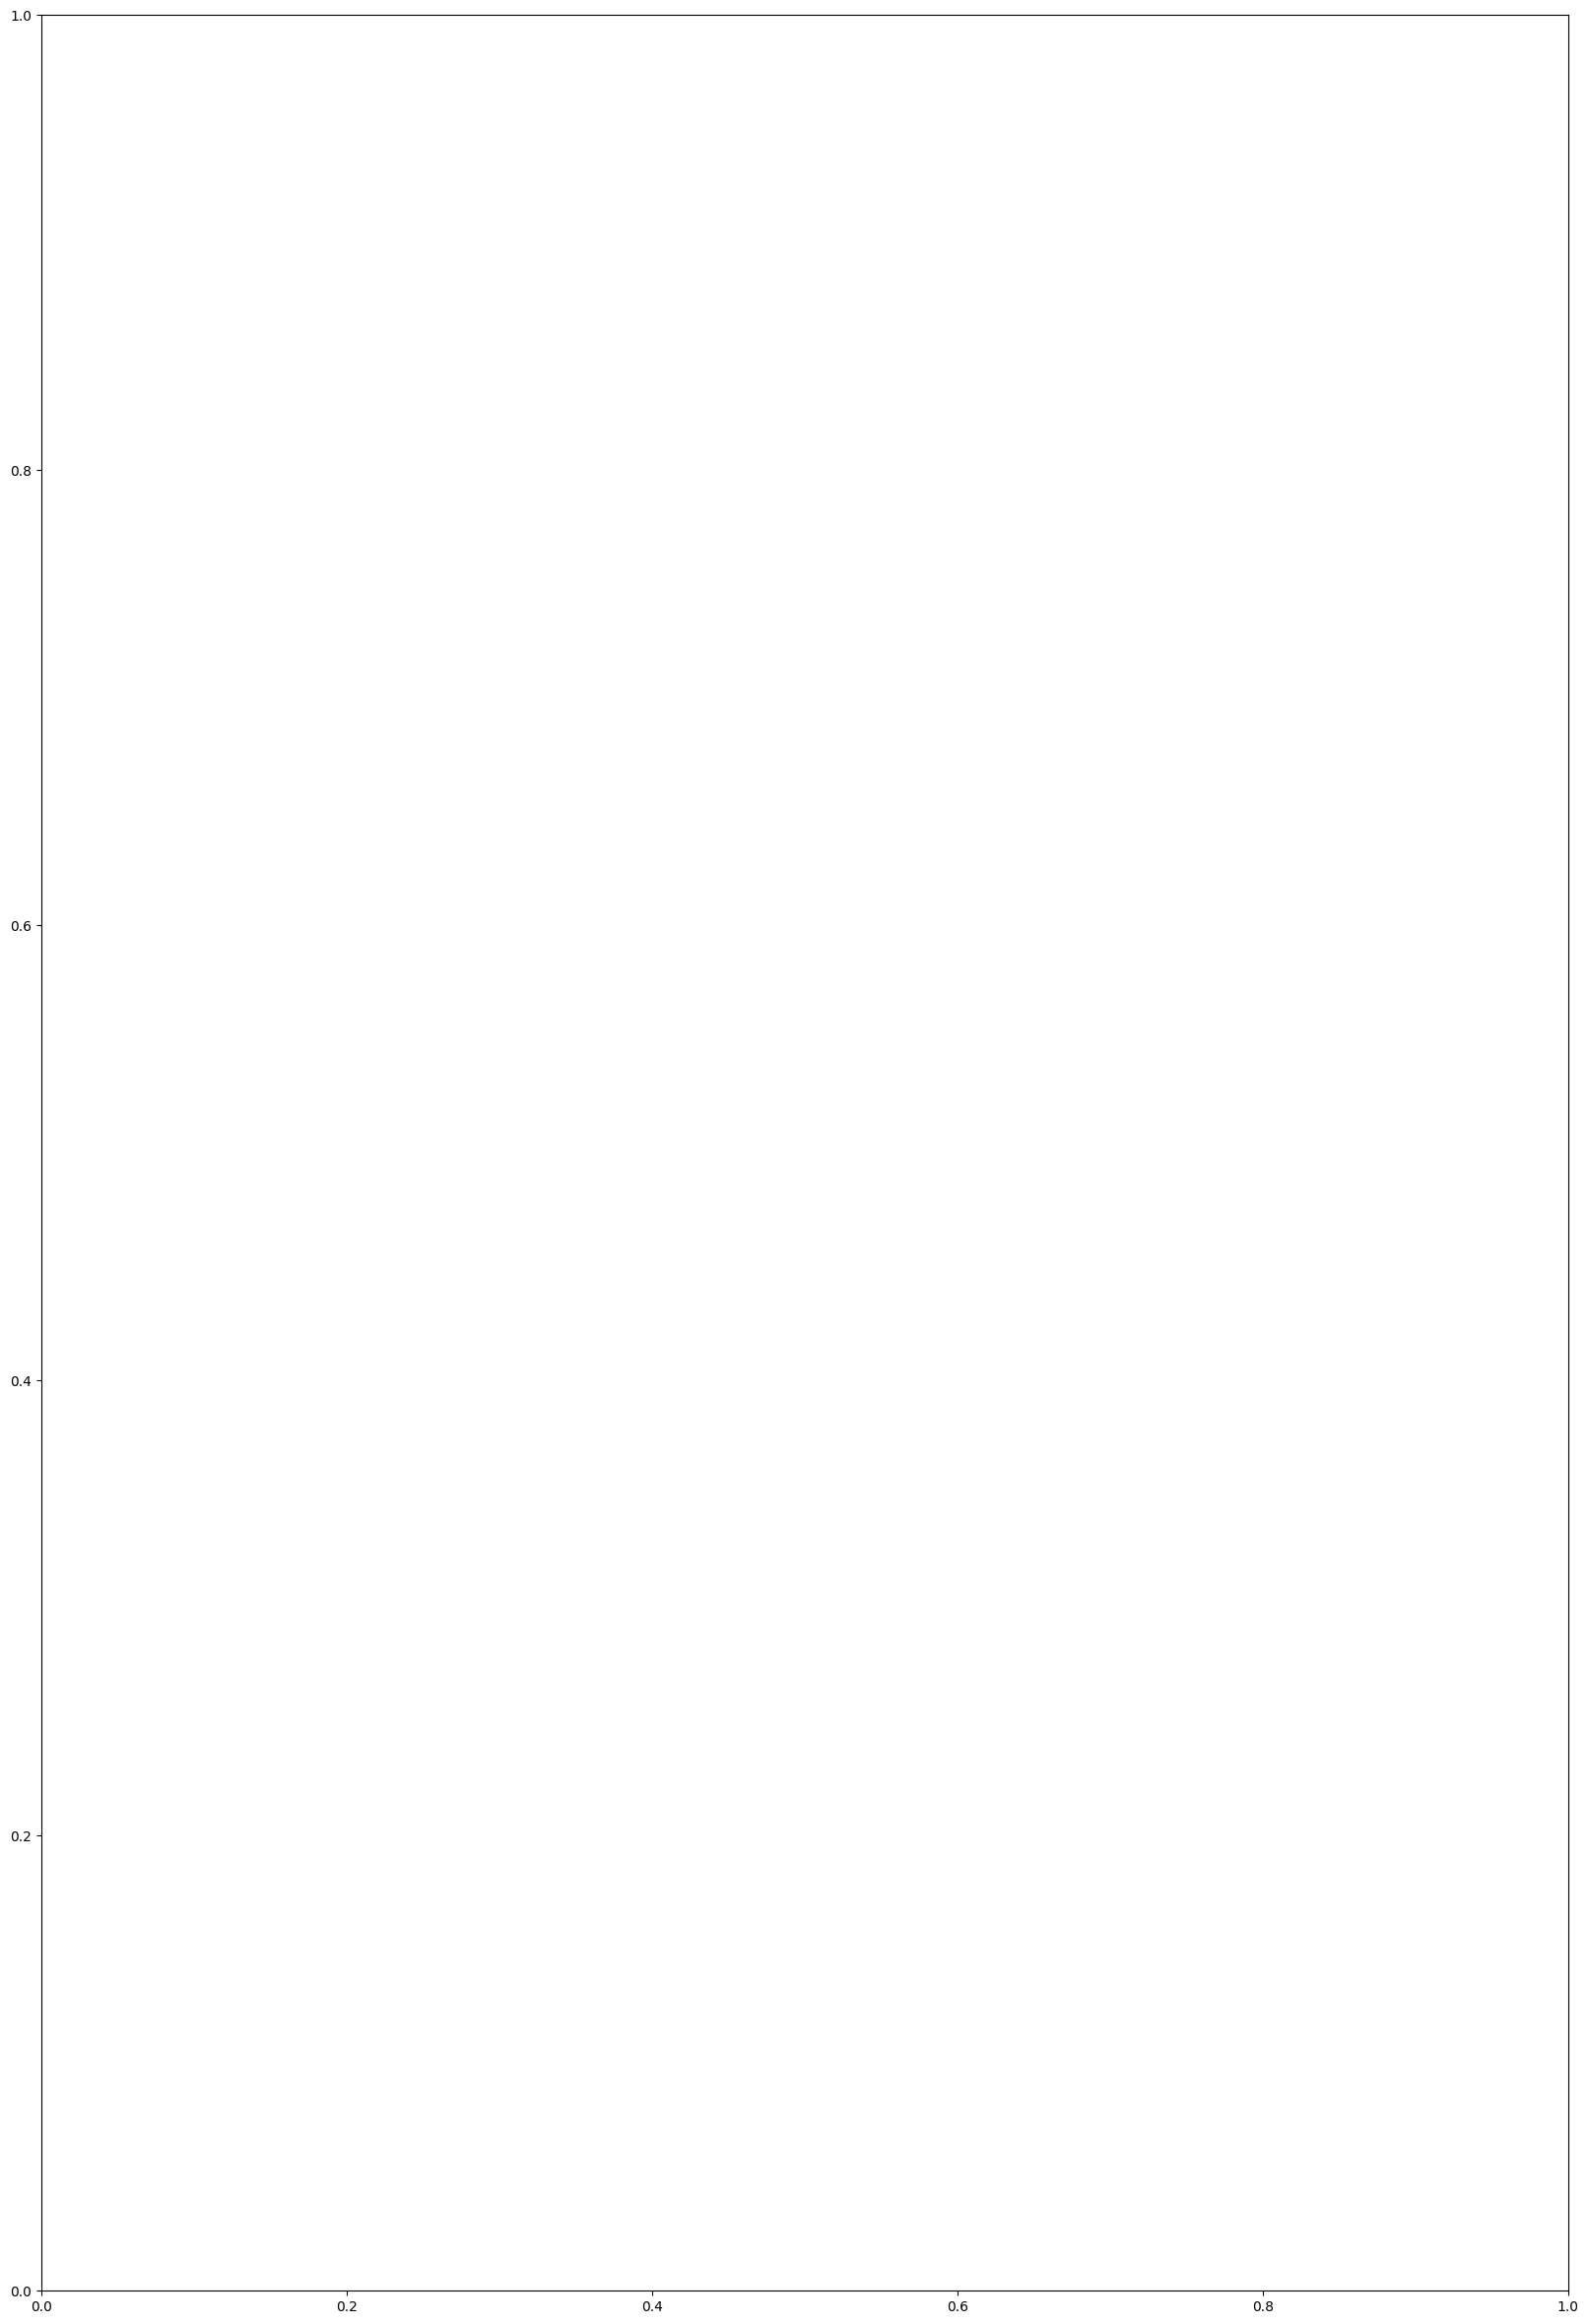

In [88]:
# take sub type and sub duration
df_duration_and_type = df[['subscription duration','product title']]
plt.rcParams["figure.figsize"] = [20, 30]
df_duration_and_type.boxplot(column=['subscription duration'], by=['product title'])
plt.xticks(rotation=90)
plt.ylabel("duration sec")
plt.savefig('bar3_without.png', bbox_inches='tight')
plt.show()

In [89]:
subs_duration = df_without

1    137.901968
2    179.893704
3     29.398148
4    140.489259
5    275.511771
Name: subscription duration, dtype: float64

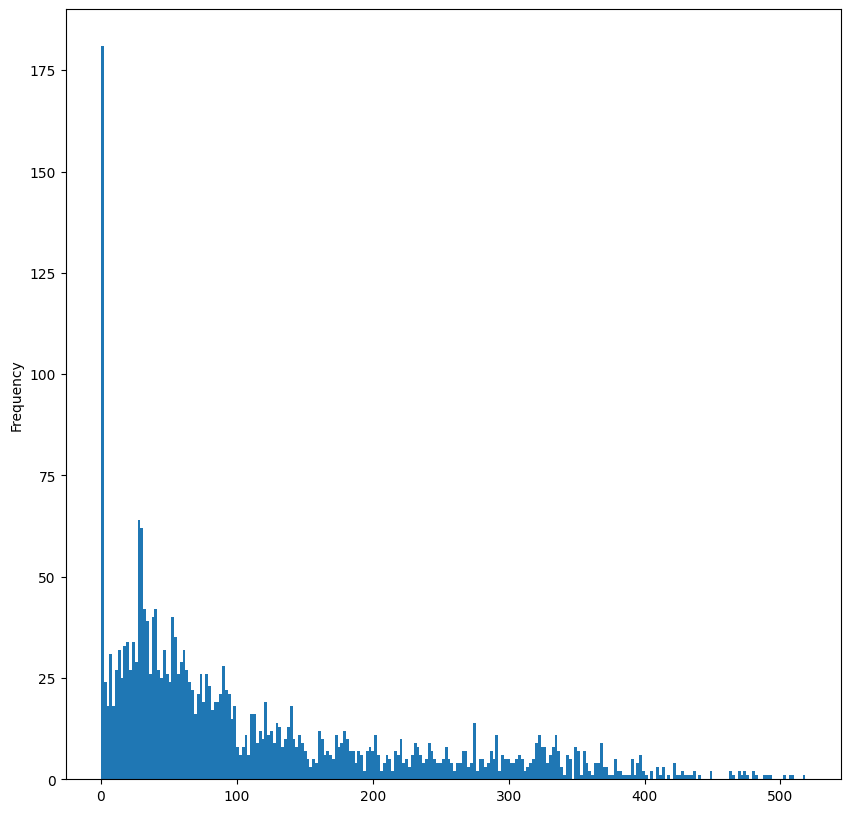

In [90]:
plt.rcParams["figure.figsize"] = [10, 10]
subs_duration = subs_duration/np.timedelta64(1, 'D')
subs_duration.plot.hist(bins=250)

subs_duration.head()

# plt.savefig('hist.png', bbox_inches='tight')
# df['subscription duration'].describe()

In [91]:
# np.seterr(divide='ignore', invalid='ignore')
# best_dist, best_p, params = get_best_distribution(df_subs_duration.astype('timedelta64[s]'))
best_dist_s, best_p_s, params_s = get_best_distribution(subs_duration)

p value for norm = 1.7113392817484897e-61
p value for exponweib = 1.3231027726173088e-74
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 3.033838399911684e-235
p value for genextreme = 1.3099278475911166e-06
Best fitting distribution: genextreme
Best p value: 1.3099278475911166e-06
Parameters for the best fit: (-0.5308846955810717, 48.689162759900455, 53.96574258900886)


C:\Users\jaesu\PycharmProjects\Analysis\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


C:\Users\jaesu\PycharmProjects\Analysis\venv\lib\site-packages\scipy\stats\_continuous_distns.py:2534: RuntimeWarning: invalid value encountered in power
  np.sign(c)*(-g3 + (g2 + 2*g2mg12)*g1)/g2mg12**1.5,


Mean: 1.6724283997485485
Variance: nan
Skew: nan
Kurtosis: nan


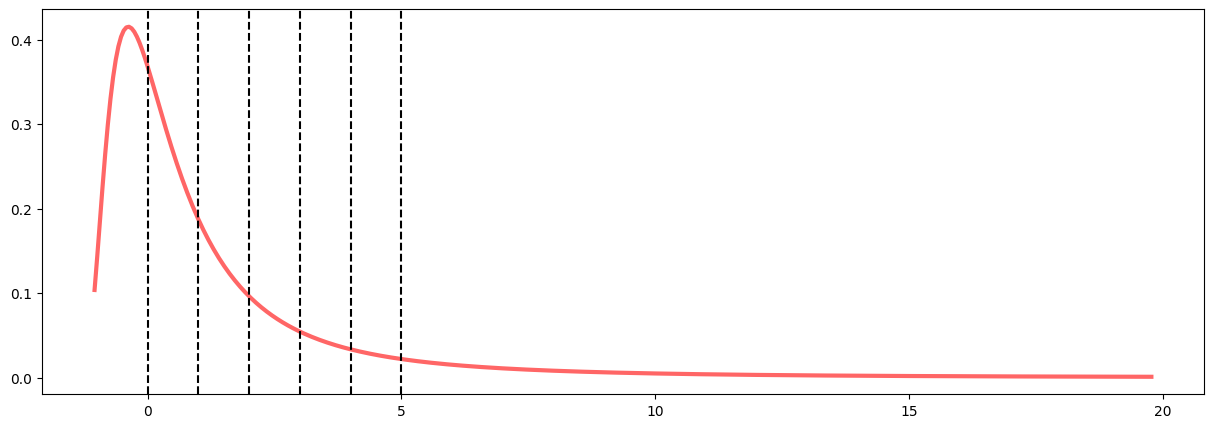

In [92]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, ax = plt.subplots(1, 1)

c = params_s[0]
# loc = params_s[1]
# scale = params_s[2]
mean, var, skew, kurt = st.genextreme.stats(c, moments='mvsk')

print("Mean: " + str(mean))
print("Variance: " + str(var))
print("Skew: " + str(skew))
print("Kurtosis: " + str(kurt))

x = np.linspace(st.genextreme.ppf(0.01, c), st.genextreme.ppf(0.99, c), 400)

# standardized form
ax.plot(x, st.genextreme.pdf(x, c), 'r-', lw=3, alpha=0.6, label='genex pdf')

x_position = [0, 1, 2, 3, 4, 5]
for xc in x_position:
    plt.axvline(x=xc, color='k', linestyle='--')

# real form
# ax.plot(x, st.genextreme.pdf(x, c, loc, scale), 'r-', lw=3, alpha=0.6, label='genex pdf')

plt.show()

In [93]:
# PATH = 'dataset.csv'
# df = pd.read_csv(PATH)
#
# # quick summary
# print(df.head())
# print(df.info())
#
# # index and sorting
# df = df.sort_values(by='time_period', ascending=True)
# df = df[df['total_active_subscribers'] > 0]
# df = df.set_index(df['time_period'])
# df['time_period'] = pd.to_datetime(df['time_period'])
#
# df.describe()
#
# plt.rcParams["figure.figsize"] = [10, 10]
# plt.scatter(x=df['time_period'], y=df['total_active_subscribers'])
# plt.plot()
# plt.xticks(rotation=90)
# plt.savefig('bar4.png', bbox_inches='tight')
# plt.show()
#
# df.count()

In [94]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('inactive_subs.ipynb')